In [3]:
import pandas as pd

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [5]:
print(subway_df['meanprecipi'].std(ddof=0))

0.01634405287803309


In [13]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    std_x = x.std(ddof=0)
    mean_x = x.mean()
    std_y = y.std(ddof=0)
    mean_y = y.mean()
    standardized_x = (x - mean_x) / std_x
    standardized_y = (y - mean_y) / std_y
    correlation_array = standardized_x * standardized_y
    correlation = correlation_array.mean()
    return correlation

In [14]:
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))

print(correlation(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


In [15]:
x = pd.Series([1, 2, 3, 4])
y = pd.Series([10, 11, 12, 13])

In [17]:
correlation(x,y)

1.0

In [20]:
# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print(df1 + df2)


    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [21]:
# Adding DataFrames with overlapping column names 
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print(df1 + df2)


    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [22]:
# Adding DataFrames with overlapping row indexes
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
print(df1 + df2)


         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [28]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits.diff()

In [29]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [31]:
import pandas as pd

# Change False to True for this block of code to see what it does

# DataFrame applymap()
if True:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print(df.applymap(add_one))

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [32]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [33]:
grades_df.head()

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67


In [39]:
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    if grades>89:
        letter_grades = 'A'
    elif grades>79:
        letter_grades = 'B'
    elif grades>69:
        letter_grades = 'C'
    elif grades>59:
        letter_grades = 'D'
    else:
        letter_grades = 'F'
    return letter_grades

In [40]:
grades_df.applymap(convert_grades)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [41]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [42]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [44]:
# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print(convert_grades_curve(grades_df['exam1']))
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print(grades_df.apply(convert_grades_curve))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [48]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    standardized_df = (df - df.mean()) / df.std(ddof=0)
    return standardized_df

In [49]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if True:   
    print(df.apply(np.mean))
    print(df.apply(np.max))
    

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [11]:
def second_largest_column(column):
    column_sort = column.sort_values(ascending=False)
    return column_sort.iloc[1]

In [12]:
second_largest_column(df['a'])

4

In [13]:
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    
    return df.apply(second_largest_column)

In [14]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

In [16]:
import pandas as pd

# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    

    
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)
    
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164
    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44
    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN
    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164
    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [17]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [18]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
})

In [19]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [20]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [21]:
df.add(s, axis='index')

,0,1,2,3
0,11,51,91,131
1,22,62,102,142
2,33,73,113,153
3,44,84,124,164


In [22]:
df.add(s, axis='columns')

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [23]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)


In [24]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [51]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    standardized_df = (df - df.mean()) / df.std()
    return standardized_df

In [52]:
standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [48]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    std_row = df.std(axis='columns',ddof=0)
    mean_row = df.mean(axis='columns')
    distance_to_mean = df.sub(mean_row, axis='index')
    standardized_row = distance_to_mean.div(std_row, axis='index')
    return standardized_row

In [49]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


In [85]:
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [86]:
grouped_data = example_df.groupby('even')

In [87]:
grouped_data.groups

{False: Index(['a', 'b', 'e'], dtype='object'),
 True: Index(['c', 'd', 'f', 'g'], dtype='object')}

In [88]:
 grouped_data = example_df.groupby(['even', 'above_three'])

In [89]:
grouped_data.groups

{(False, False): Index(['a', 'b', 'e'], dtype='object'),
 (True, False): Index(['c'], dtype='object'),
 (True, True): Index(['d', 'f', 'g'], dtype='object')}

In [90]:
grouped_data = example_df.groupby('even')

In [91]:
grouped_data.sum()['value']

even
False     5
True     16
Name: value, dtype: int32

In [92]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

In [93]:
subway_df

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15.0,34.0,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19.0,40.0,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488.0,118.0,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490.0,132.0,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231.0,232.0,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177


In [99]:
subway_grouped_hour = subway_df.groupby('day_week')

In [100]:
mean_by_hour = subway_grouped_hour.mean()['ENTRIESn_hourly']

(array([1., 0., 1., 0., 0., 0., 1., 0., 1., 3.]),
 array([1066.43610578, 1191.49973312, 1316.56336046, 1441.62698781,
        1566.69061515, 1691.7542425 , 1816.81786984, 1941.88149718,
        2066.94512453, 2192.00875187, 2317.07237922]),
 <a list of 10 Patch objects>)

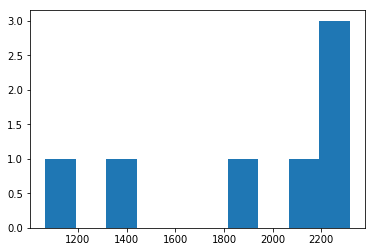

In [101]:
plt.hist(mean_by_hour)

Populating the interactive namespace from numpy and matplotlib


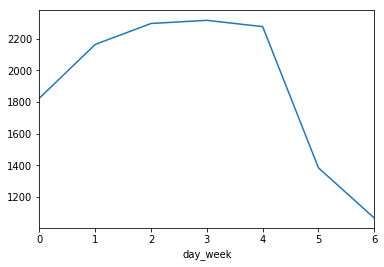

In [102]:
%pylab inline
import seaborn as sns

mean_by_hour.plot()

# Using groupby() to Calculate Hourly Entries and Exits

In [103]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})


In [107]:
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [105]:
def get_hourly_entries_and_exits_column(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits.diff()

In [112]:
ridership_df.groupby('UNIT')['ENTRIESn', 'EXITSn'].apply(get_hourly_entries_and_exits_column)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [113]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    
    return ridership_df.groupby('UNIT')['ENTRIESn', 'EXITSn'].apply(get_hourly_entries_and_exits_column)

In [115]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


# Merge()

In [117]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [121]:
combined_df=subway_df.merge(weather_df, on=['DATEn','hour','latitude','longitude'], how='inner')

In [122]:
combined_df

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


# PLOT

In [123]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [127]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [149]:
## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

data_by_Location = subway_df.groupby(['latitude','longitude'], as_index=False).mean()

In [161]:
scaled_entries = 10 * data_by_Location['ENTRIESn_hourly'] / data_by_Location['ENTRIESn_hourly'].std()

Populating the interactive namespace from numpy and matplotlib


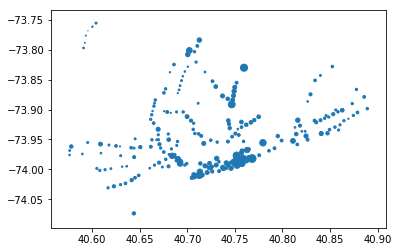

In [162]:
%pylab inline
import seaborn as sns
scatter(data_by_Location['latitude'], data_by_Location['longitude'], s=scaled_entries)